In [ ]:
##BUILD AND SAVE DATASET##
img_folder = 'images'
from tflearn.data_utils import build_hdf5_image_dataset
import os

#Deletes hidden .DS_Store file from sub
try:
    for sub in os.listdir(img_folder):
        if not sub  == '.DS_Store':
            os.remove('{}/{}/.DS_Store'.format(img_folder,sub))
except:
    pass

build_hdf5_image_dataset(img_folder, 
                         image_shape=(128, 128), #resizes
                         mode='folder', 
                         output_path='dataset.h5', #saves data to a file
                         categorical_labels=True, 
                         normalize=True)

##Only need run the above once##

[1,0] == CALZONE
[0,1] == PIZZA
Eg: [Calzone-ness, Pizza-ness]

In [46]:
##LOAD IMAGES##
import h5py
from tflearn.data_utils import shuffle
h5f = h5py.File('dataset.h5', 'r')
data = h5f['X']
labels = h5f['Y']
data, labels = shuffle(data,labels) #shuffles the data and labels in parallel

In [ ]:
##CONSTRUCTING THE NETWORK##

from tflearn.layers.core import input_data, fully_connected, dropout
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression

net = input_data(shape=(None,128,128,3))
net = conv_2d(net, 32, 3, activation='relu',regularizer='L2')
net = max_pool_2d(net, 2)

net = conv_2d(net, 64, 3, activation='relu',regularizer='L2')
net = max_pool_2d(net, 2)

net = conv_2d(net, 128, 3, activation='relu',regularizer='L2')
net = max_pool_2d(net, 2)

net = fully_connected(net, 128, activation='relu')
net = dropout(net, 0.8)

net = fully_connected(net, 256, activation='relu')
net = dropout(net, 0.8)

net = fully_connected(net, 2, activation='softmax')

net = regression(net, optimizer='adam', learning_rate=1e-3,
                     loss='categorical_crossentropy')

In [ ]:
##TRAINING THE MODEL##
from tflearn.models import dnn
model = dnn.DNN(net, tensorboard_verbose=0)
model.fit(data, labels, n_epoch=20,
           validation_set=.1,
           snapshot_step=100, show_metric=True, run_id='italiaNet')

In [ ]:
##SAVING THE MODEL##
model.save('{}.model'.format(MODEL_NAME))

Label: [ 0.  1.]


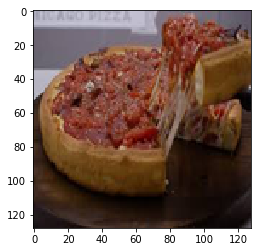

In [49]:
#Displaying First image & label as sample
from matplotlib import pyplot as plt
print("Label:", labels[0])
plt.imshow(data[0], interpolation='nearest')
plt.show()